In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



# Tight-binding model of 1D chain

## Introduction
This notebook provides a very basic example to the band structure calculation using the tight-binding approximation description of the one-dimensional periodic chain of atoms with two sites per unit cell.


One can write the Hamiltonian by projecting the intercell and intracell hoppings to sites A and B: 
$$H_1^{ab}=\langle \psi_A | H_1 | \psi_B \rangle = \gamma _1  $$
$$H_2^{ab}=\langle \psi_A | H_2 | \psi_B \rangle = \gamma_2 $$
$$H = H_1 + H_2$$
Under such projection, the Hamiltonian is converted into a form of 2x2 matrix.

With the Bloch functions, the intercell hopping is then:
$$H_2^{ab}=\langle \psi_A | H_2 | \exp(-ika) \psi_B \rangle =\gamma_2 \exp(-ika)$$
considering the on-site potentials $\varepsilon_1$ and $\varepsilon_2$ on sites A and B, we write the Hamiltonian matrix in terms of wavevector k:
$$H_{00}=\left(\begin{array}{cc}
\varepsilon_1 & \gamma_1\\
\gamma_1 & \varepsilon_2
\end{array}\right)$$
$$H_{01}=\left(\begin{array}{cc}
0 & \gamma_2 \exp(ika)\\
0 & 0
\end{array}\right)$$
$$H_{10}=\left(\begin{array}{cc}
0 & 0\\
\gamma_2\exp(-ika) & 0
\end{array}\right)$$

The whole Hamiltonian matrix writes:
$$H(k)=H_{00}+H_{01}+H_{10}=\left(\begin{array}{cc}
\varepsilon_1 & \gamma_1+\gamma_2 \exp(ika)\\
\gamma_1+\gamma_2\exp(-ika) & \varepsilon_2
\end{array}\right)$$

In order to calculate the bands, one should diagonalize the Hamiltonian $H(k)$ for each $k$ in the first Brillouin zone, that is, to solve the following quadratic equation:
$$ (\lambda-\varepsilon_1)(\lambda-\varepsilon_2) = (\gamma_1 + \gamma_2\cos(ka))^2 + (\gamma_2\sin(ka))^2$$
<!---and the answer is :
#$$\lambda=\pm \sqrt{(\gamma_1 + \gamma_2\cos(ka))^2 + (\gamma_2\sin(ka))^2}$$--->

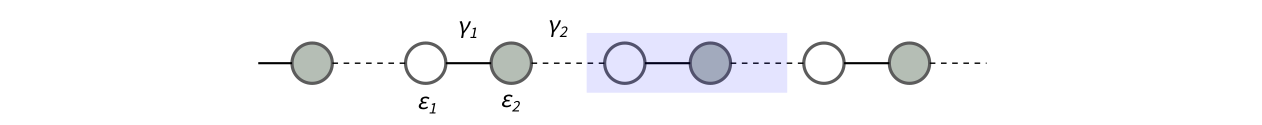   

In [2]:
def interactive_1dband(gamma_1,gamma_2,epsilon_1,epsilon_2):
    nk=40
    k=np.linspace(-1.0*np.pi,1.0*np.pi,nk)
    c=-(gamma_1+gamma_2*np.cos(k))**2-(gamma_2*np.sin(k))**2+epsilon_1*epsilon_2
    b=-(epsilon_1+epsilon_2)
    a=1
    
    x1=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    x2=(-b-np.sqrt(b**2-4*a*c))/(2*a)
    plt.ylim(-4.2, 4.2)
    plt.xlabel('ka')
    plt.ylabel('E')
    plt.plot(k,x1)
    plt.plot(k,x2)
   

In [3]:
interact(interactive_1dband,gamma_1=(0.5,1.5),gamma_2=(0.5,1.5),epsilon_1=(-0.5,0.5),epsilon_2=(-0.5,0.5))

interactive(children=(FloatSlider(value=1.0, description='gamma_1', max=1.5, min=0.5), FloatSlider(value=1.0, …

<function __main__.interactive_1dband(gamma_1, gamma_2, epsilon_1, epsilon_2)>

# Questions

- How do the band gap and the band width depend on the parameters of the model?
- At what parameters the system is gapless? Show the condition in terms of $\gamma_1, \gamma_2, \varepsilon_1, \varepsilon_2$.
- In the special case $\gamma_1 = \gamma_2 , \varepsilon_1= \varepsilon_2 = 0$, discuss the relation to the case of the periodic one-dimensional chain with one atom per unit cell considered during lecture 1.